# Titanic Survival Prediction

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

## 1. Problem Definition

The main question is that "what sorts of people were more likely to survive?" Thus, based on the inforamtion in the data, we should predict the who can survive and who cannot. As the desired output is two things, we are faced with **binary classification**.

## 2. Data

The original data can be extracted from [Kaggle](https://www.kaggle.com/c/titanic/data). It has two main *CSV* fromat files. One is the *train.csv* which our model will be trained by it and the other one is the *test.csv* which should be predctied with chosen model. 

## 3. Evaluation

The score is the percentage of passengers which are correctly predicted. Check the its `accuracy`.
https://www.kaggle.com/c/titanic/overview/evaluation

## 4. Features

Features are different parts of the data. There are 11 vairiables in total. `Survival` is the target feature which should be predicted. You can refer to the features as below descriptions:

1. Survival (0 = No, 1 = Yes)
2. pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
3. Sex
4. Age in years
5. sibsp - # of siblings / spouses aboard the Titanic
6. parch - # of parents / children aboard the Titanic
7. ticket - Ticket number
9. fare - Passenger fare
10. cabin - cabin number
11. embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


## Preparing the tools 

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

In [2]:
# Models from Scikit-Learn
# We are going to test various models to check which one can get the higher accuracy 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Loading data

In [3]:
# Loading the train dataset
df = pd.read_csv('data/train.csv')
df.shape # (rows, columns)

(891, 12)

In [4]:
#showing the first ten rows of the train data
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Obviously, some features have the missing value which should be filled as well as converting the non numerical values to numerical to be ready for modeling.

In [5]:
# Describing the features with numerical values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Info of DataFarame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As it can be seen, 177 vlaues are missing from `Age` column, 687 items are missing from `Cabin` and 2 vlaues are not available in `Embarked`.

* Due to huge number of missing vlaues in `Cabin` column, we will dismiss this column in our traing model.
* `Age` column empty values will be filled with the mediam 
* `Embarked` column empty values will be filled with the maximun count among three availble options

In [8]:
# Make a copy of the original DataFrame to perform edits on
df_edited = df.copy()
df_edited.drop('Cabin', axis=1, inplace=True) # Droping the cabin column
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [9]:
# Number of each class of Embarked feature
df_edited.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Now we are filling the missing values

# Filling the Age Column
df_edited['Age'].fillna(df_edited['Age'].median(), inplace=True)

#Filling the Embarked Column
df_edited['Embarked'].fillna('S', inplace=True)

In [11]:
df_edited.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Checking the number of each class in target variable
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

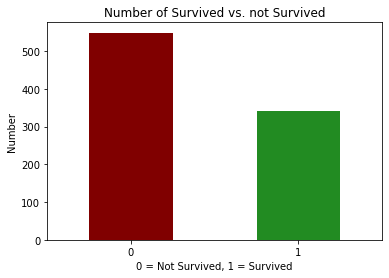

In [13]:
# Ploting the nuber of each class in bar chart
df["Survived"].value_counts().plot(kind='bar', color=['maroon','forestgreen'])
plt.title("Number of Survived vs. not Survived")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Number")
plt.xticks(rotation=0);

### Plotting and Analyzing the Data

### Age Disitribution histogram

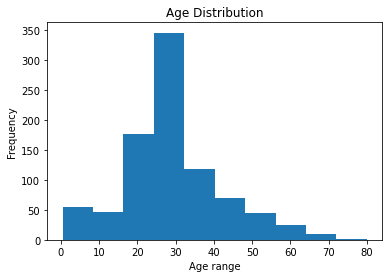

In [14]:
# Age distribution with histogram
df_edited['Age'].plot.hist()
plt.title("Age Distribution")
plt.xlabel("Age range");

### The Survival rate vs. Sex

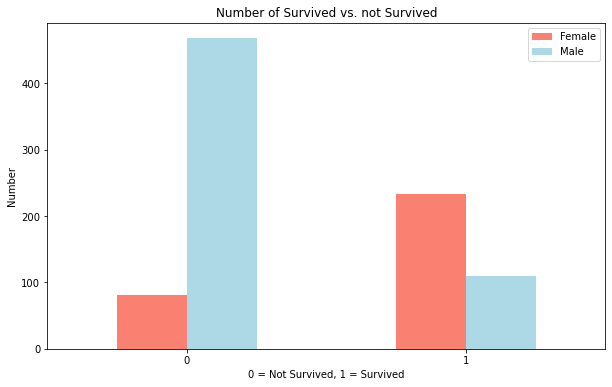

In [15]:
# Create a plot of crosstab
# Survival vs.Sex
pd.crosstab(df_edited.Survived, df_edited.Sex).plot(kind="bar",
                                                    figsize=(10, 6),
                                                    color=["salmon", "lightblue"])

plt.title("Number of Survived vs. not Survived")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Number")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### The Survival rate vs. Ticket class type

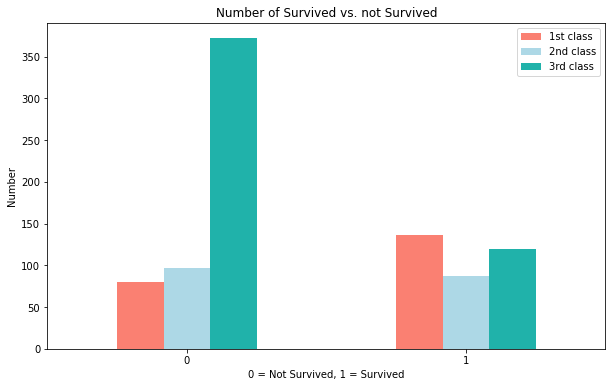

In [16]:
# Create a plot of crosstab
# Survival vs.Pclass
pd.crosstab(df_edited.Survived, df_edited.Pclass).plot(kind="bar",
                                                    figsize=(10, 6),
                                                    color=["salmon", "lightblue", "lightseagreen"])

plt.title("Number of Survived vs. not Survived")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Number")
plt.legend(["1st class", "2nd class", "3rd class"])
plt.xticks(rotation=0);

### Manipulating the data and make it ready for the model

To apply the data to model, all the data should be in numeric format. Thus, it is a time to change those columns with non-numeric format to numeric ones.

In addition, we need to remove those columns which do not have the valuable information for prediction.

In [17]:
df_edited.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# This will turn all of the string value into category values
for label, content in df_edited.items():
    if pd.api.types.is_string_dtype(content):
        df_edited[label] = content.astype("category").cat.as_ordered()

In [19]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 126.5 KB


In [20]:
# Turn categorical variables into numbers and fill missing
for label, content in df_edited.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_edited[label] = pd.Categorical(content).codes

In [21]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
dtypes: float64(2), int16(2), int64(5), int8(2)
memory usage: 54.1 KB


Now, our data is read to be trained by selected models.

### Splitting the data to features and target

In [22]:
# Splitting the data to X & y
X = df_edited.drop('Survived', axis=1)
y = df_edited['Survived']

#Selected features 
#features = ["Pclass", "Sex", "SibSp", "Parch"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(X[features])

X.shape, y.shape

((891, 6), (891,))

### Splitting data to train and validation dataset

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 6), (179, 6), (712,), (179,))

## Modeling

Now we've got our data split into training and validation sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set and we'll test it (use the patterns) on the validation set.

We're going to try 3 different machine learning models:

1. K-Nearest Neighbours Classifier
2. Random Forest Classifier

In [24]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_val : Validation data (no labels)
    y_train : training labels
    y_val : Validation labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through model 
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluates the model and append its scores to model_scores
        model_scores[name] = model.score(X_val, y_val)
    return model_scores

In [25]:
model_scores = fit_and_score(models, X_train, X_val, y_train, y_val)
model_scores

{'KNN': 0.7932960893854749, 'Random Forest': 0.8100558659217877}

Based on the score results, the RandomForestClassifier model has a bit a better accuracy than KNeighborsClassifier.

### Hyperparameter tuning with RandomizedSearchCV and GridSearchCV

We're going to tune `RandomForestClassifier()` using `RandomizedSearchCV`and `GridSearchCV()`.

In [26]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(200, 1000, 50),
           "max_depth": [None],
           "min_samples_split": np.arange(10, 20, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

In [27]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([10, 12, 14, 16, 18]),
                                        'n_estimators': array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800,
       850, 900, 950])},
                   verbose=True)

In [28]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 500,
 'min_samples_split': 14,
 'min_samples_leaf': 7,
 'max_depth': None}

In [29]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_val, y_val)

0.8156424581005587

### Importing the test dataset and make the prediction 

In [30]:
# Importing the test dataset an preparing for the prediction
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
# remving Cabin column
df_test.drop('Cabin', axis=1, inplace=True) # Droping the cabin column


In [34]:
# Filling the empty item of Age and Fare columns
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [35]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
# Converting the non-numerica column to numeric ones
# This will turn all of the string value into category values
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    category
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    category
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(4), float64(2), int64(4)
memory usage: 58.5 KB


In [38]:
# Turn categorical variables into numbers and fill missing
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label] = pd.Categorical(content).codes

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(2)
memory usage: 22.2 KB


In [40]:
#Selected features 
#features = ["Pclass", "Sex", "SibSp", "Parch"]
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
X_test = pd.get_dummies(df_test[features])
X_test.shape

(418, 6)

In [41]:
# Now it is a time to make a predition with Randomforest model
# X & y 
model = RandomForestClassifier(n_estimators = 500,
                               min_samples_split = 14,
                               min_samples_leaf = 7,
                               max_depth = None, random_state=42)

model.fit(X,y)
y_preds = model.predict(X_test)

In [42]:
y_preds.shape

(418,)

In [43]:
# Now we can convert our data to desired output.
output = pd.DataFrame({
    "PassengerId": df_test.PassengerId,
    "Survived": y_preds
})

output.to_csv("data/predicted_submission.csv", index=False)
print("The output CSV file was saved successfully!!")

The output CSV file was saved successfully!!
